In [3]:
import numpy as np
import sklearn.neural_network

ImportError: No module named scipy

In [3]:
f1 = open('data/profiles.csv', 'r')
f2 = open('data/profiles_fixed.csv', 'w')
for line in f1:
    line = line.replace('Micronesia, Federated States of', 'Federated States of Micronesia')
    line = line.replace('Korea, Republic of', 'Republic of Korea')
    line = line.replace('Iran, Islamic Republic of', 'Islamic Republic of Iran')
    line = line.replace('Virgin Islands, British', 'British Virgin Islands')
    line = line.replace('Korea, Democratic People\'s Republic of', 'Democratic People\'s Republic of Korea')
    line = line.replace('Palestinian Territory, Occupied', 'Palestinian Territory Occupied')
    line = line.replace('Tanzania, United Republic of', 'Tanzania United Republic of')
    line = line.replace('Congo, the Democratic Republic of the', 'Congo the Democratic Republic of the')
    line = line.replace('Virgin Islands, U.s.', 'Virgin Islands U.s.')
    line = line.replace('Virgin Islands, U.s.', 'Virgin Islands U.s.')
    f2.write(line)
f1.close()
f2.close()

In [4]:
# relies on chopping off column headers ahead of time. 
artists = np.loadtxt('data/artists.csv', dtype='string', delimiter=',')
print artists
profiles = np.loadtxt('data/profiles_fixed.csv', dtype='string', delimiter=',')
print profiles.shape

# fixing erroneous, irrelevant ages like 1002
max_age = 120
for p in profiles:
    if p[2] != '' and (int(p[2]) >= max_age or int(p[2]) < 0):
        p[2] = ''

[['03098741-08b3-4dd7-b3f6-1b0bfa2c879c' 'Liars']
 ['69c4cc43-8163-41c5-ac81-30946d27bb69' 'CunninLynguists']
 ['7a2e6b55-f149-4e74-be6a-30a1b1a387bb' 'The Desert Sessions']
 ..., 
 ['8974da95-e631-45aa-8fd7-aa0c2795f997' 'Harry Gregson-Williams']
 ['8067c102-4996-42bc-9980-06ce2e644eae' 'Soul Coughing']
 ['39c2a93d-9afa-4a22-9bba-c087ab056e1c' 'Jefferson Airplane']]
(233286, 4)


In [5]:
nation_dict = {}
count = 0
for p in profiles:
    if p[3] not in nation_dict:
        nation_dict[p[3]] = None
num_nations = len(nation_dict)
count = 0
for key in nation_dict.keys():
    nation_dict[key] = np.zeros(num_nations)
    nation_dict[key][count] = 1
    count += 1

In [6]:
train = np.loadtxt('data/train.csv', dtype='string', delimiter=',')
print train

[['eb1c57ddc9e0e2d005169d3a1a96e8dd95e3af03'
  '5a8e07d5-d932-4484-a7f7-e700793a9c94' '554']
 ['44ce793a6cd9d20f13f4a576a818ef983314bb5d'
  'a3a92047-be1c-4f3e-8960-c4f8570984df' '81']
 ['da9cf3f557161d54b76f24db64be9cc76db008e3'
  'eeb1195b-f213-4ce1-b28c-8565211f8e43' '708']
 ..., 
 ['b464ce35f8f875fdf686fd3dc4ce165b650bde7a'
  '199d0ab3-22c0-4c00-b99d-257f591dda1f' '29']
 ['d8ccd698ad712c26d2620dff07f27473b9173ad9'
  'a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432' '56']
 ['b7d94e5f82e157f94df6c93f283a181108f780c4'
  '7527f6c2-d762-4b88-b5e2-9244f1e34c46' '240']]


In [7]:
artists_1h = {}
num_art = len(artists)
for a in range(num_art):
    one_hot = np.zeros(num_art)
    one_hot[a] = 1
    artists_1h[artists[a][0]] = one_hot

In [8]:
profiles_1h = {}
num_prof = len(profiles)
for p in range(num_prof):
    
#     one_hot_id = np.zeros(num_prof)
#     one_hot_id[p] = 1
    
    one_hot_gender = np.zeros(3)
    if profiles[p][1] == 'f':
        one_hot_gender[0] = 1
    elif profiles[p][1] == 'm':
        one_hot_gender[1] = 1
    else:
        one_hot_gender[2] = 1

    one_hot_age = np.zeros(max_age + 1)
    if profiles[p][2] == '':
        one_hot_age[max_age] = 1
    else:
        one_hot_age[int(profiles[p][2])] = 1
        
    one_hot_nation = nation_dict[profiles[p][3]]
    
#     profiles_1h[profiles[p][0]] = np.concatenate((one_hot_id, one_hot_gender, one_hot_age, one_hot_nation))
    profiles_1h[profiles[p][0]] = np.concatenate((one_hot_gender, one_hot_age, one_hot_nation))

In [1]:
# temp = np.concatenate((profiles_1h[train[0][0]], artists_1h[train[0][1]]))
# print temp
# X = np.array(temp)
# Y = np.array(train[0][1])
examples = len(train) - 100
ex_len = 2366
X = np.array(np.zeros((examples, ex_len)))
Y = np.array(np.zeros(examples))
count = 0
for t in train[:examples]:
    temp = np.concatenate((profiles_1h[t[0]], artists_1h[t[1]]))
#     print X.shape
#     print temp.shape
    X[count] = temp
    Y[count] = int(t[2])
    if count % 1000 == 0:
        print count
    count += 1
print X
print Y.shape

NameError: name 'train' is not defined

In [86]:
cv_examples = 100
cv_ex_len = 2366
X_cv = np.array(np.zeros((cv_examples, cv_ex_len)))
Y_cv = np.array(np.zeros(cv_examples))
count = 0
for t in train[examples : examples + cv_examples]:
    temp = np.concatenate((profiles_1h[t[0]], artists_1h[t[1]]))
#     print X.shape
#     print temp.shape
    X_cv[count] = temp
    Y_cv[count] = int(t[2])
    if count % 1000 == 0:
        print count
    count += 1
print X_cv
print Y_cv.shape

0
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]
(100,)


In [87]:
NN = sklearn.neural_network.MLPRegressor()
NN.fit(X, Y)
preds = NN.predict(X_cv)
error = preds - Y_cv
for i in range(100):
    print(str(preds[i]) + ' ' + str(Y_cv[i]))

311.747231636 652.0
781.551933301 16.0
515.197314709 51.0
119.813371815 247.0
126.810742141 135.0
187.417089997 380.0
749.36984853 621.0
391.481497748 690.0
76.3992128789 15.0
65.7395202735 150.0
165.20506387 8.0
134.627050256 84.0
-97.0321321011 115.0
454.413601781 192.0
357.791414373 111.0
260.849656346 168.0
-190.29221911 253.0
264.63767736 92.0
117.423530622 1074.0
-19.9807314789 27.0
187.115096859 429.0
167.841854468 178.0
242.519994855 8.0
355.655199676 1136.0
745.967465782 237.0
68.1152991427 97.0
331.892303412 35.0
-14.7067224792 51.0
345.125058514 24.0
75.3858731554 379.0
666.10677251 114.0
169.946397608 199.0
325.858264207 11.0
267.96100951 38.0
309.498522386 100.0
276.275011644 171.0
555.16893633 3281.0
706.043746935 191.0
797.817479369 1185.0
244.306852148 2.0
423.110719522 21.0
599.141959176 668.0
36.5994940672 68.0
286.265195927 91.0
128.658465517 1186.0
190.730982967 59.0
219.528367689 116.0
219.512645042 48.0
672.362592317 189.0
279.110577598 44.0
35.0829212137 20.0
74.

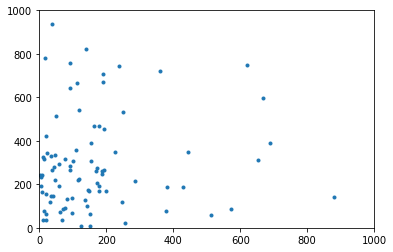

In [88]:
import matplotlib.pyplot as plt
plt.plot(Y_cv, preds, '.')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()